**RISK ASSESSMENT FOR AIRCRAFTS IN THE AVIATION SECTOR**

**Problem Statement**

By getting involved in the aviation sector, the company is braodening it's portfolio by buying and managing aircraft for both 
individual and commercial business. The distinct operational and safety issues connected to various aircraft models,however, 
are not well understood. To choose the aircraft with the best safety records and fewest hazards, it's difficult to evaluate 
past safety and performance data. Leadership in the aviation division will be better eqquiped to make wise purchases and put 
risk-reduction plans into action thanks to this analysis.

**Objectives**

**1. Establish a Relationship Between Aircraft Features and Accident Severity**

To examine important aircraft features (Model,Make,Engine Type, Aircraft Damage) in conjuction with the injury metrics
(Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured) to identify which models routinely
exhibit lower accident severity rates.

**2. Evaluate the Effects of Weather and Flight on the Severity of Accidents**

Examine the effects of weather(VMC vs IMC) on accident outcomes. To also assertain when the hazards are greatest, 
examine incidents by general flight phases(Take off, Cruise/enoute, Approach/Landing).

**3. Create a Data-Informed Risk Profile to help with Aircraft Investing Decision**

Considering accident fatalities, iinjury severity and aircraft damage to rank aircraft safety. Make recommendations on the 
safest aircraft types for the company's commercial and private aviation investments.

**Data Cleaning and Visualization of The Dataset**

**1. Data Cleaning**

**a) Importing and inspecting data**

We start by import the Pandas library,Numpy library, matplotlib.pyplot library that we'll be using in data cleaning and visualiasation and also load the AviationData using (pd.read_csv).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("AviationData.csv", encoding= "latin-1", lowmemory= False)
df.replace("-", np.nan, inplace=True)
#used latin-1 beacause utf-18 wasn't able to encode the csv file.
df

C:\Users\User\AppData\Local\Temp\ipykernel_13364\1965686645.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding= "latin-1")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Calling the first five and last five rows of the data.

In [18]:
#called the first five rows using .head()
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [19]:
#called the last five rows using .tail()
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [20]:
#used the .info() to have an over view of the entire dataset(dtypes,missing values,overall structures)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50130 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The dataset is a pandas DataFrame that has a combination of objects and floats ; 5 columns are floats and 26 columns are objects.

We also get to see the columns with the most number of missing values and the ones that have less missing values.

In [23]:
#use the .shape to check the shape of the dataset
df.shape

(88889, 31)

The Aviation dataset has 88889 rows and 31 columns, making it a two dimensional matrix

In [25]:
#use the .column fnction to check the columns in the data
df.columns
#This gives us the total columns taht are in the dataset

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [26]:
#do the .describes to get an overview of the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Only the numeric columns are affected/inputed using the method. We see the count,mean,minimum and maximum values.

**b) Handling Missing Values and Inconsistent Data**

We start by checkiing the null and placeholder values in the dataset.

In [30]:
#using .isnull() and .sum() to check the null values and sum of the null values
df.isnull()
#returns a bool (True if it's null and False if it's not)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [31]:
#sum the null values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38759
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

This helps us in knowing which columns are likely to be dropped since they contain so many null values and replacing them will affect our findings or analysis.

In [33]:
#replace the null values in least affected columns
location_mode= df["Location"].mode()[0]
df["Location"]=df["Location"].fillna(location_mode)
df["Location"].head()

0    MOOSE CREEK, ID
1     BRIDGEPORT, CA
2      Saltville, VA
3         EUREKA, CA
4         Canton, OH
Name: Location, dtype: object

Replaced all null values with the mode.

In [35]:
#Do the same for all the others
Make_mode= df["Make"].mode()[0]
df["Make"]=df["Make"].fillna(Make_mode)
df["Make"].head()

0     Stinson
1       Piper
2      Cessna
3    Rockwell
4      Cessna
Name: Make, dtype: object

In [36]:
#Model of the aircraft
Model_mode= df["Model"].mode()[0]
df["Model"]=df["Model"].fillna(Model_mode)
df["Model"].head()

0       108-3
1    PA24-180
2        172M
3         112
4         501
Name: Model, dtype: object

In [37]:
#Injury Severity
Injury_Severity= df["Injury.Severity"].mode()[0]
df["Injury.Severity"]=df["Injury.Severity"].fillna(Injury_Severity)
df["Injury.Severity"].head()

0    Fatal(2)
1    Fatal(4)
2    Fatal(3)
3    Fatal(2)
4    Fatal(1)
Name: Injury.Severity, dtype: object

In [38]:
#For aircraft damage
Aircraft_damage = df["Aircraft.damage"].mode()[0]
df["Aircraft.damage"]=df["Aircraft.damage"].fillna(Aircraft_damage)
df["Aircraft.damage"].head()

0    Destroyed
1    Destroyed
2    Destroyed
3    Destroyed
4    Destroyed
Name: Aircraft.damage, dtype: object

In [39]:
#Change for the amature built as well
Amateur_built= df['Amateur.Built'].mode()[0]
df['Amateur.Built']= df['Amateur.Built'].fillna(Amateur_built)
df['Amateur.Built'].head()

0    No
1    No
2    No
3    No
4    No
Name: Amateur.Built, dtype: object

In [40]:
#define fnct to standardize the injury severity column
def standardize_severity (word):
    if word.startswith("Fatal"):
     return "Fatal"
    else:
     return word

In [41]:
df["Injury.Severity"]=df["Injury.Severity"].apply(standardize_severity)

In [42]:
df["Injury.Severity"].replace("Unavailable",np.nan, inplace=True)#replace Unknown with nan
severity= df["Injury.Severity"].mode()[0]
df["Injury.Severity"]= df["Injury.Severity"].fillna(severity)

In [43]:
df["Injury.Severity"].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Minor', 'Serious'], dtype=object)

In [44]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

Weather Condition has null values and placeholder values(UNK,Unk) that need to be replaced. First we're going to convert them to null values
then replace them with the "mode" weather condition as we don't want to drop any data.

In [46]:
#Convert all the strings to uppercase
df["Weather.Condition"] = df["Weather.Condition"].str.upper()

In [47]:
#convert the unknown weather conditions to null 
df["Weather.Condition"].replace("UNK", np.nan, inplace=True)

In [48]:
#The unique weather conditions are now VMC and IMC; with NaN that have been converted.
df["Weather.Condition"].unique()

array([nan, 'IMC', 'VMC'], dtype=object)

In [49]:
#Replace all the nulls with the mode
Weather_mode= df["Weather.Condition"].mode()[0]
df["Weather.Condition"]= df["Weather.Condition"].fillna(Weather_mode)

In [50]:
df['Weather.Condition'].unique()

array(['VMC', 'IMC'], dtype=object)

In [51]:
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [52]:
df["Purpose.of.flight"].replace("Unknown",np.nan, inplace=True)#replace Unknown with nan
Purpose_flight= df["Purpose.of.flight"].mode()[0]
df["Purpose.of.flight"]= df["Purpose.of.flight"].fillna(Purpose_flight)#replace all nulls with the mode 
df["Purpose.of.flight"].head()

0    Personal
1    Personal
2    Personal
3    Personal
4    Personal
Name: Purpose.of.flight, dtype: object

In [53]:
df["Number.of.Engines"] = pd.to_numeric(df["Number.of.Engines"], errors="coerce")
df["Number.of.Engines"].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

In [54]:
df["Number.of.Engines"].isnull().describe()

count     88889
unique        2
top       False
freq      82805
Name: Number.of.Engines, dtype: object

In [55]:
No_of_engines= df["Number.of.Engines"].mode()[0]
df["Number.of.Engines"] =df["Number.of.Engines"].fillna(No_of_engines)

In [56]:
df["Engine.Type"].isnull().describe()#get the description of the nulls and non-null values with the frequency of the most present

count     88889
unique        2
top       False
freq      81793
Name: Engine.Type, dtype: object

In [57]:
df["Engine.Type"].unique()#check for unkwons or placeholder values

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [58]:
df["Engine.Type"].replace(["UNK", "NONE"], np.nan, inplace=True)#replace placeholder values with null values
type_engine= df["Engine.Type"].mode()[0]
df["Engine.Type"] =df["Engine.Type"].fillna(type_engine)#replace the nulls with the mode engine type

In [59]:
df["Total.Fatal.Injuries"] = pd.to_numeric(df["Total.Fatal.Injuries"], errors="coerce")
df["Total.Fatal.Injuries"].unique()

array([  2.,   4.,   3.,   1.,  nan,   0.,   8.,  78.,   7.,   6.,   5.,
       153.,  12.,  14.,  23.,  10.,  11.,   9.,  17.,  13.,  29.,  70.,
       135.,  31., 256.,  25.,  82., 156.,  28.,  18.,  43.,  15., 270.,
       144., 174., 111., 131.,  20.,  73.,  27.,  34.,  87.,  30.,  16.,
        47.,  56.,  37., 132.,  68.,  54.,  52.,  65.,  72., 160., 189.,
       123.,  33., 110., 230.,  97., 349., 125.,  35., 228.,  75., 104.,
       229.,  80., 217., 169.,  88.,  19.,  60., 113., 143.,  83.,  24.,
        44.,  64.,  92., 118., 265.,  26., 138., 206.,  71.,  21.,  46.,
       102., 115., 141.,  55., 121.,  45., 145., 117., 107., 124.,  49.,
       154.,  96., 114., 199.,  89.,  57., 152.,  90., 103., 158., 157.,
        42.,  77., 127.,  50., 239., 295.,  58., 162., 150., 224.,  62.,
        66., 112., 188.,  41., 176.])

In [60]:
#replacing all the nulls with the mode using the lambda function
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].apply(lambda x: df["Total.Fatal.Injuries"].mode()[0] if pd.isna(x) else x)

In [61]:
df["Total.Serious.Injuries"] = pd.to_numeric(df["Total.Serious.Injuries"], errors="coerce")#convert no numbers
df["Total.Serious.Injuries"].unique()

array([  0.,  nan,   2.,   1.,   6.,   4.,   5.,  10.,   3.,   8.,   9.,
         7.,  15.,  17.,  28.,  26.,  47.,  14.,  81.,  13., 106.,  60.,
        16.,  21.,  50.,  44.,  18.,  12.,  45.,  39.,  43.,  11.,  25.,
        59.,  23.,  55.,  63.,  88.,  41.,  34.,  53.,  33.,  67.,  35.,
        20., 137.,  19.,  27., 125., 161.,  22.])

In [62]:
#replacing all the nulls with the mode using the lambda fnct
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].apply(lambda x: df["Total.Serious.Injuries"].mode()[0] if pd.isna(x) else x)

In [63]:
df["Total.Minor.Injuries"] = pd.to_numeric(df["Total.Minor.Injuries"], errors="coerce")
df["Total.Minor.Injuries"].unique()

array([  0.,  nan,   1.,   3.,   2.,   4.,  24.,   6.,   5.,  25.,  17.,
        19.,  33.,  14.,   8.,  13.,  15.,   7.,   9.,  16.,  20.,  11.,
        12.,  10.,  38.,  42.,  29.,  62.,  28.,  31.,  39.,  32.,  18.,
        27.,  57.,  50.,  23., 125.,  45.,  26.,  36.,  69.,  21.,  96.,
        30.,  22.,  58., 171.,  65.,  71., 200.,  68.,  47., 380.,  35.,
        43.,  84.,  40.])

In [64]:
#replacing all the nulls with the mode using the lambda function
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].apply(lambda x: df["Total.Minor.Injuries"].mode()[0] if pd.isna(x) else x)

In [65]:
df["Total.Uninjured"] = pd.to_numeric(df["Total.Uninjured"], errors="coerce")#to numeric value
df["Total.Uninjured"].unique()

array([  0.,  nan,  44.,   2.,   1.,   3.,   6.,   4., 149.,  12., 182.,
       154.,   5.,  10.,   7., 119.,  36.,  51.,  16.,  83.,   9.,  68.,
        30.,  20.,  18.,   8., 108.,  11., 152.,  21.,  48.,  56., 113.,
       129., 109.,  29.,  13.,  84.,  74., 142., 102., 393., 128., 112.,
        17.,  65.,  67., 136.,  23., 116.,  22.,  57.,  58.,  73., 203.,
        31., 201., 412., 159.,  39., 186., 588.,  82.,  95., 146., 190.,
       245., 172.,  52.,  25.,  59., 131., 151., 180., 150.,  86.,  19.,
       133., 240.,  15., 145., 125., 440.,  77., 122., 205., 289., 110.,
        79.,  66.,  87.,  78.,  49., 104., 250.,  33., 138., 100.,  53.,
       158., 127., 160., 260.,  47.,  38., 165., 495.,  81.,  41.,  14.,
        72.,  98., 263., 188., 239.,  27., 105., 111., 212., 157.,  46.,
       121.,  75.,  71.,  45.,  91.,  99.,  85.,  96.,  50.,  93., 276.,
       365., 371., 200., 103., 189.,  37., 107.,  61.,  26., 271., 130.,
        89., 439., 132., 219.,  43., 238., 195., 11

In [66]:
#replacing all the nulls with the mode using the lambda fnct
df["Total.Uninjured"] = df["Total.Uninjured"].apply(lambda x: df["Total.Uninjured"].mode()[0] if pd.isna(x) else x)

In [67]:
df["Registration.Number"].isna().describe()#87507 non-null values

count     88889
unique        2
top       False
freq      87507
Name: Registration.Number, dtype: object

In [68]:
#used the .apply() method with the lambda function
df["Registration.Number"]= df["Registration.Number"].apply(lambda x: df["Registration.Number"].mode()[0] if pd.isna(x) else x)
df["Registration.Number"].head()

0    NC6404
1    N5069P
2    N5142R
3    N1168J
4     N15NY
Name: Registration.Number, dtype: object

In [69]:
df["Broad.phase.of.flight"].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [70]:
df["Broad.phase.of.flight"].replace(["Unknown","Other"],np.nan, inplace=True)#converting placeholder values to null values for easier replacement
#replacing all the nulls with the mode using the lambda function
Flight_phase= df["Broad.phase.of.flight"].mode()[0]
df["Broad.phase.of.flight"] = df["Broad.phase.of.flight"].fillna(Flight_phase)#replace the nulls with the mode phase
df["Broad.phase.of.flight"].unique()

array(['Cruise', 'Landing', 'Approach', 'Climb', 'Takeoff', 'Taxi',
       'Descent', 'Maneuvering', 'Standing', 'Go-around'], dtype=object)

In [71]:
df["Airport.Code"].unique()

array([nan, 'N58', 'JAX', ..., 'SKMD', 'OMAA', 'EIKH'], dtype=object)

In [72]:
df["Airport.Code"].replace([np.nan, "NONE"], "Missing", inplace=True)#replace the nulls and NONE with a string "missing"
df["Airport.Code"].value_counts().head()

Airport.Code
Missing    40247
PVT          485
APA          160
ORD          149
MRI          137
Name: count, dtype: int64

In [73]:
df["Airport.Name"].value_counts()

Airport.Name
Private                           240
PRIVATE                           224
Private Airstrip                  153
NONE                              146
PRIVATE STRIP                     111
                                 ... 
STEHEKIN                            1
OTTAWA MUNICIPAL                    1
DWIGHT AIRPORT                      1
PHOENIX DEER VALLEY MUNI            1
WICHITA DWIGHT D EISENHOWER NT      1
Name: count, Length: 24870, dtype: int64

In [74]:
df["Airport.Name"].replace([np.nan, "NONE"], "Missing", inplace=True)#replace the name with missing cause the numbers are too
#high to change(36331).If we replace they're going to have a huge impact on the data, so I choose to replace with a string.
df["Airport.Name"].value_counts().head()

Airport.Name
Missing             36331
Private               240
PRIVATE               224
Private Airstrip      153
PRIVATE STRIP         111
Name: count, dtype: int64

In [75]:
df["Publication.Date"].unique()

array([nan, '19-09-1996', '26-02-2007', ..., '22-12-2022', '23-12-2022',
       '29-12-2022'], dtype=object)

In [76]:
df["Publication.Date"].replace(np.nan, "Missing", inplace=True)#replace the nulls with "missing".
pub_date= df["Publication.Date"].mode()[0]
df["Publication.Date"].replace("Missing", pub_date, inplace = True)

In [77]:
df["Total_severity"]=df["Total.Fatal.Injuries"]+ df["Total.Serious.Injuries"]+df["Total.Minor.Injuries"]#sum the casualties into another column

In [78]:
df["Country"] = df["Country"].apply(lambda x: df["Country"].mode()[0] if pd.isna(x) else x)#Replacing the missing countries with the mode country.
df["Country"].unique()

array(['United States', 'GULF OF MEXICO', 'Puerto Rico', 'ATLANTIC OCEAN',
       'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan', 'Angola',
       'Germany', 'Korea, Republic Of', 'Martinique', 'American Samoa',
       'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico', 'Dominica',
       'Netherlands Antilles', 'Iceland', 'Greece', 'Guam', 'Australia',
       'CARIBBEAN SEA', 'West Indies', 'Japan', 'Philippines',
       'Venezuela', 'Bermuda', 'San Juan Islands', 'Colombia',
       'El Salvador', 'United Kingdom', 'British Virgin Islands',
       'Netherlands', 'Costa Rica', 'Mozambique', 'Jamaica', 'Panama',
       'Guyana', 'Norway', 'Hong Kong', 'Portugal', 'Malaysia',
       'Turks And Caicos Islands', 'Northern Mariana Islands',
       'Dominican Republic', 'Suriname', 'Honduras', 'Congo', 'Belize',
       'Guatemala', 'Anguilla', 'France', 'St Vincent And The Grenadines',
       'Haiti', 'Montserrat', 'Papua New Guinea', 'Cayman Islands',
       'Sweden', 'Taiwan', 'Senegal', 'Bar

In [79]:
print(df.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     88889 non-null  object 
 14  Make                    88889 non-null

In [81]:
#convert date to real time
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors= "coerce")
df["Event.Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88889 entries, 0 to 88888
Series name: Event.Date
Non-Null Count  Dtype         
--------------  -----         
88889 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 694.6 KB


In [82]:
df['Latitude'] = df['Latitude'].replace(np.nan,'missing data')
df['Longitude'] = df['Longitude'].replace(np.nan,'missing data')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_severity
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,missing data,missing data,Missing,Missing,...,NaN,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,25-09-2020,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,missing data,missing data,Missing,Missing,...,NaN,4.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,19-09-1996,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Missing,Missing,...,NaN,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,missing data,missing data,Missing,Missing,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,missing data,missing data,Missing,Missing,...,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0


REMOVING DUPLICATES


In [84]:
df.duplicated().sum()

0

We have zero duplicates in the dataset!

In [86]:
#let's create a new column of years to check the trend over the years
df["Year.ACC"] = df["Event.Date"].dt.year
df["Year.ACC"].head()

0    1948
1    1962
2    1974
3    1977
4    1979
Name: Year.ACC, dtype: int32

In [87]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_severity,Year.ACC
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,missing data,missing data,Missing,Missing,...,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,25-09-2020,2.0,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,missing data,missing data,Missing,Missing,...,4.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,19-09-1996,4.0,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Missing,Missing,...,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,3.0,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,missing data,missing data,Missing,Missing,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,missing data,missing data,Missing,Missing,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0,1979


In [88]:
#dropping columns that have excess missing values.
df.drop("Schedule",axis=1, inplace= True)
df.drop("Air.carrier",axis=1,inplace= True)
df.drop("FAR.Description", axis =1,inplace= True)
df.drop("Aircraft.Category",axis = 1,inplace= True)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_severity,Year.ACC
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,missing data,missing data,Missing,Missing,...,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,25-09-2020,2.0,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,missing data,missing data,Missing,Missing,...,4.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,19-09-1996,4.0,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Missing,Missing,...,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,3.0,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,missing data,missing data,Missing,Missing,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,missing data,missing data,Missing,Missing,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0,1979


**DATA VISUALIZATION**

**1. Establish a Relationship Between Aircraft Features and Accident Severity**

a)**SCATTER MATRIX**

Will show the connections between injury metrics (Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, and Total Uninjured) and aircraft attributes (Model, Make, Engine Type, and Aircraft Damage):drawing attention to correlations and trends.

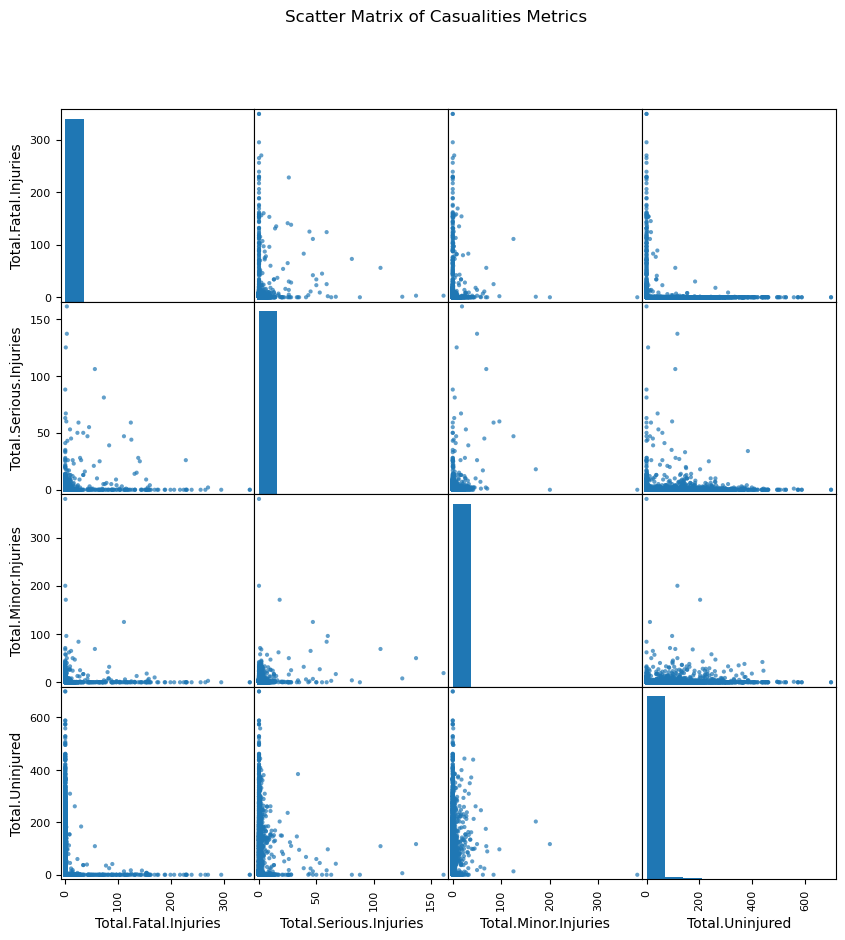

In [93]:
pd.plotting.scatter_matrix(df[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]],figsize=(10,10), alpha=.7)
plt.suptitle("Scatter Matrix of Casualities Metrics")
plt.show()

b). **BarChart**

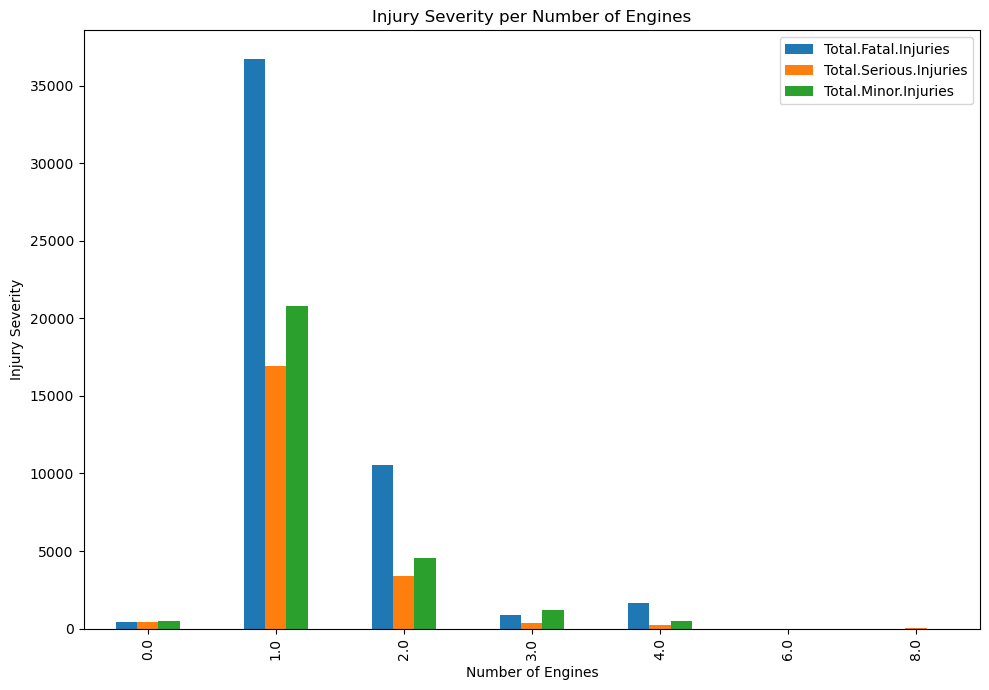

In [95]:
#We're going to check how engine type correlaates to the injury metrics
engtype_severity=df.groupby("Number.of.Engines")[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries"]].sum()
ax = engtype_severity.plot(kind="bar", figsize=(10,7))
plt.title("Injury Severity per Number of Engines")
plt.xlabel("Number of Engines")
plt.ylabel("Injury Severity")
plt.tight_layout()
plt.legend()
plt.show()

From the graph, ONE-ENGINE aircrafts have the most number of Injured people(Fatalities being the highest; followed by Minor and Serious Injuries respectively). TW0-ENGINE aircrafts come second recording a high in Fatal,Minor and Serious respectively , followed by the THREE-ENGINE that has a high in Minor injures,Fatal and Serious respectively. In the FOUR-ENGINE aircrafts has more Fatal injuries over Minor and Serious respectively while NONE-ENGINED aircrafts have a relatively equal number of Injuries . EIGHT=ENGINED aircrafts have lowest number of injured people having only a small number of Minor Injured people, while the SIX-ENGINE has no records of Injuries(less commonly used).

**2. Evaluate the Effects of Weather and Flight on the Severity of Accidents**

**a). BarCharts**

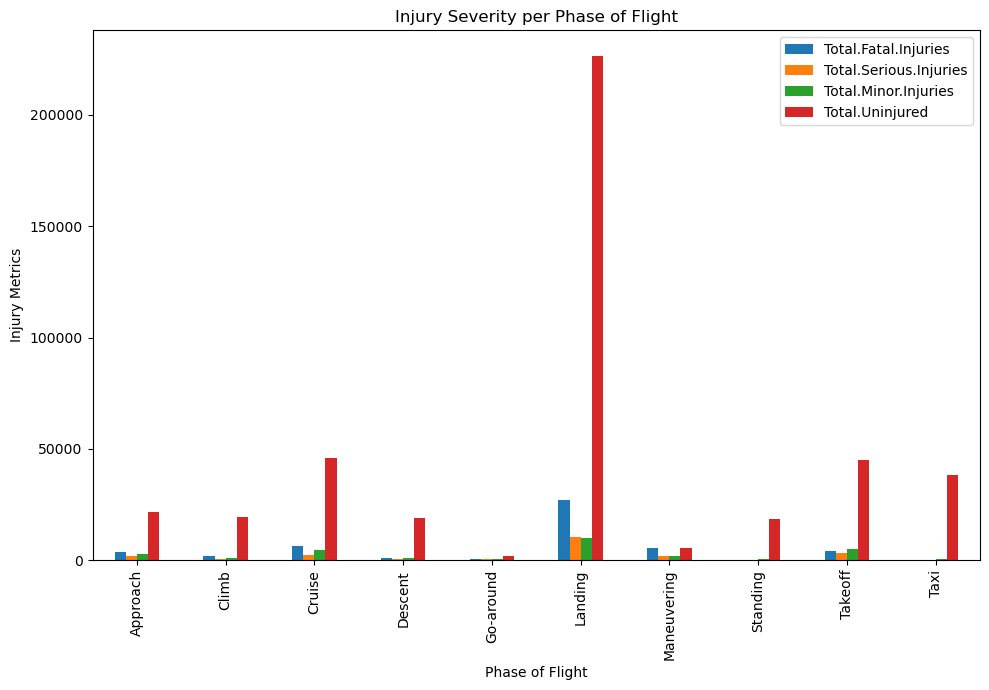

In [99]:
phase_severity=df.groupby("Broad.phase.of.flight")[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]].sum()
ax = phase_severity.plot(kind="bar", figsize=(10,7))
plt.title("Injury Severity per Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Injury Metrics")
plt.tight_layout()
plt.legend()
plt.show()

From the above grapgh , we are able to see that the Landing phase experiences the most uninjured records and also the most 
Fatal Injuries,Serious and Minor Injuries respectively. Followed by Cruise ,  Take off, Taxi , Approach respectively in less number of casualties. With the Standing phase, Taxi phase, Gp-around phase and Descent phase with the record lowest interms of casualties respectively.

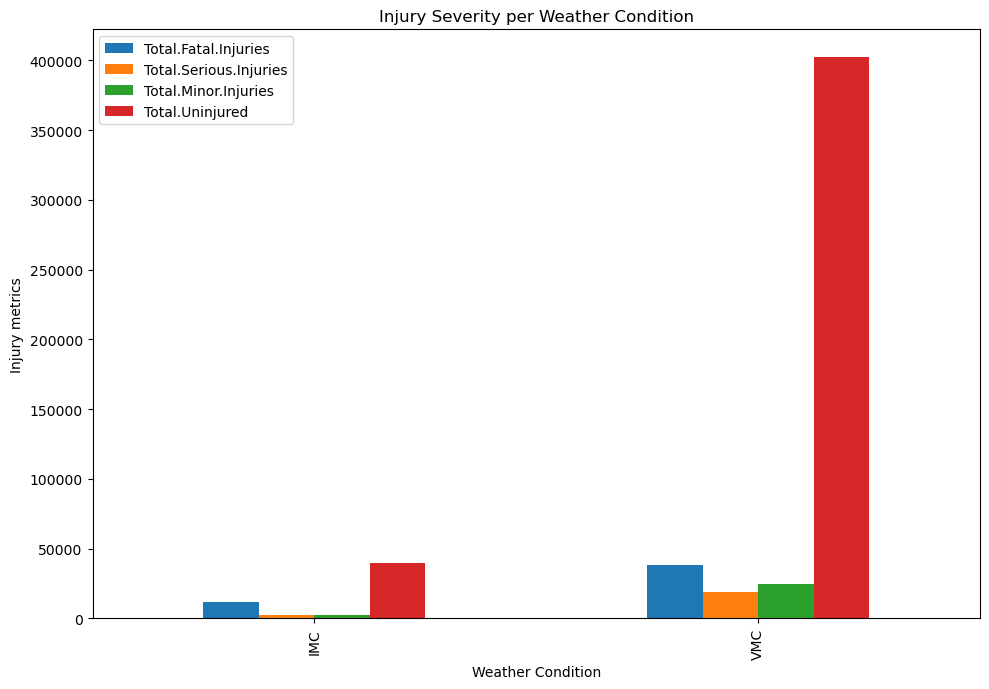

In [101]:
weather_severity=df.groupby("Weather.Condition")[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]].sum()
ax = weather_severity.plot(kind="bar", figsize=(10,7))
plt.title("Injury Severity per Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Injury metrics")
plt.tight_layout()
plt.legend()
plt.show()

From the graph, VMC(good weather conditions) experience the highest number of Uninjured people and also the most Fatally, Seriously, and Minor Injured people. IMC(poor weather conditions) on the other hand experiences a higher number of Uninjured people but more number of Fataly injured people with a record low of both Serious and Minor injuries. 

**3. Create a Data-Informed Risk Profile to help with Aircraft Investing Decision**

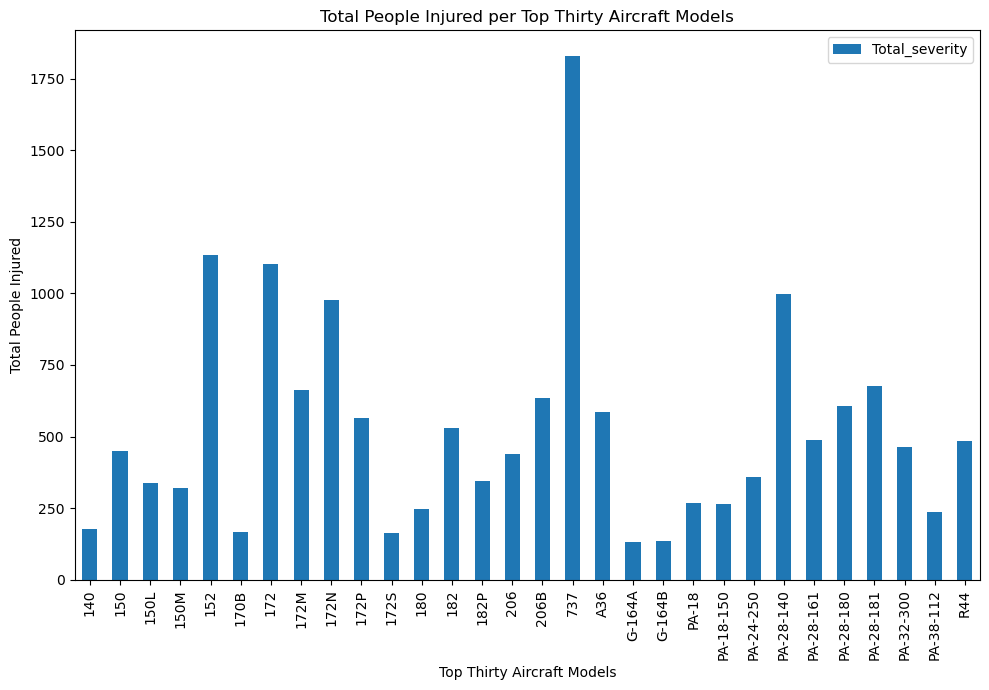

In [185]:
#To check the model with the most number of I njured people that have used it over the years
top_models = df["Model"].value_counts().head(30).index#get the top thirty names of the models
models = df[df["Model"].isin(top_models)]#collect the number of times/counts in the entire column
model_metrics = models.groupby("Model")["Total_severity"].sum()#group the make and no. of engines by the total uninjured, limiting it to the models
model_metrics.plot(kind="bar",figsize=(10,7))#plotting
plt.title("Total People Injured per Top Thirty Aircraft Models")
plt.xlabel("Top Thirty Aircraft Models")
plt.ylabel("Total People Injured")
plt.tight_layout()
plt.legend()
plt.show()

From thegraph above we are able to see the Top Thirty Aircraft Models in the market with the highest numbers of casualties across the years.
"737" recording the highest metrics , "152" coming in second , "172" in third and a tie between "172N" and "PA-28-140". "G-164A", "G-164B" and "172S" having the lowest records.

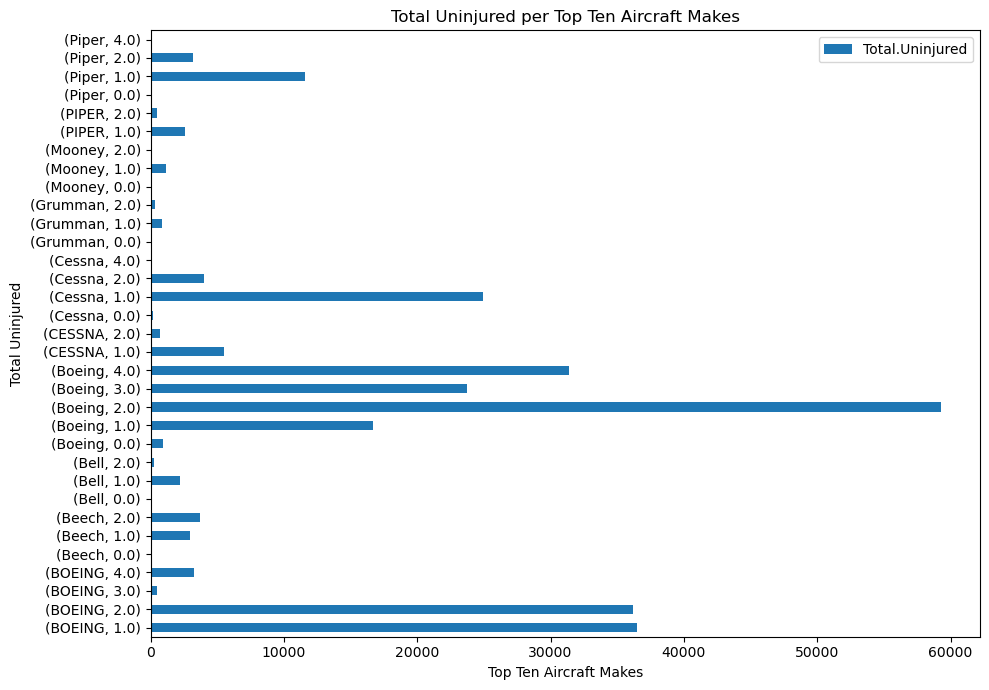

In [106]:
#To check the safest Aircraft Make and Number of Engines with the number of uninjured people that have used it over the years
top_makes = df["Make"].value_counts().head(10).index#get the top ten names of the plane
makes = df[df["Make"].isin(top_makes)]#collect the number of times/counts in the entire column
make_metrics = makes.groupby(["Make","Number.of.Engines"])["Total.Uninjured"].sum()#group the make and no. of engines by the total uninjured, limiting it to the models
make_metrics.plot(kind="barh",figsize=(10,7))#plotting follows
plt.title("Total Uninjured per Top Ten Aircraft Makes")
plt.xlabel("Top Ten Aircraft Makes")
plt.ylabel("Total Uninjured")
plt.tight_layout()
plt.legend()
plt.show()

From the bar graph above, the appropriate Make-Engine-numbers Aircraft to buy is 2-engine,Boeing whis has the highest record of Uninjured people followed by the 2-engine,BOEING and 1-engine,BOEING. Generally, Beoing has the highest number of Uninjured passangers over all the other Aircrafts. Mooney and Grummna having the least numbers followed by PIPER and Bell.

In [188]:
df.to_csv("Cleaned_AircraftData.csv", index= False)

**Recommendations**

**1.**  According to accident severity analysis, give priority to investing in aircrafts with a track record of safety; with the biggest percentage off passengers who are umimjured in **Cessna** and **Boeing** models. These models have superior safety records /better accident survival rates.

**2.** The most dangerous phase of flight is Landing phase which has the highest number of overall injuries. This phase ought to be the focus of additional safety proceures and pilot training. Using highly advanced technology for landing assistance, pilot training and runway monitoring to increase landing safety.

**3.** Injuries have been decreasing over the years, either as a result of better technology, stricter laws or fewer flights. Inorder to strenghen optimum safety procedures, this tendency needs more research. Also promoting risk assessments and aviation safety training based on accident trends in general.

**4.** Personal flights have the most uninjured people, suggesting considerations for the Private Sector; or rather when choosing a fleet of airlines to invest in thorough evaluations should be done. 